<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/machine-learning/titanic_predict2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Machine Learning Competition: Predicting Titanic Survivors

* Competition Site
* Description
* Evaluation
* Data Set
* Setup Imports and Variables
* Explore the Data
* Feature: Passenger Classes
* Feature: Sex
* Feature: Embarked
* Feature: Age
* Feature: Family Size
* Final Data Preparation for Machine Learning
* Data Wrangling Summary
* Random Forest: Training
* Random Forest: Predicting
* Random Forest: Prepare for Kaggle Submission

## Competition Site

Description, Evaluation, and Data Set taken from the [competition site](https://www.kaggle.com/c/titanic-gettingStarted).

## Description

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Evaluation

The historical data has been split into two groups, a 'training set' and a 'test set'.  For the training set, we provide the outcome ( 'ground truth' ) for each passenger.  You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ).  Your score is the percentage of passengers you correctly predict.

 The Kaggle leaderboard has a public and private component.  50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ).  Your score on this public portion is what will appear on the leaderboard.  At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner.  This method prevents users from 'overfitting' to the leaderboard.

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .csv (59.76 kb)   |
| gendermodel      | .csv (3.18 kb)    |
| genderclassmodel | .csv (3.18 kb)    |
| test             | .csv (27.96 kb)   |
| gendermodel      | .py (3.58 kb)     |
| genderclassmodel | .py (5.63 kb)     |
| myfirstforest    | .py (3.99 kb)     |

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

## Setup Imports and Variables

In [0]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

Read the data:

In [0]:
df_train = pd.read_csv('./drive/My Drive/titanic/train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [0]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column.  We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

Text(0.5, 1.0, 'Age Histogram')

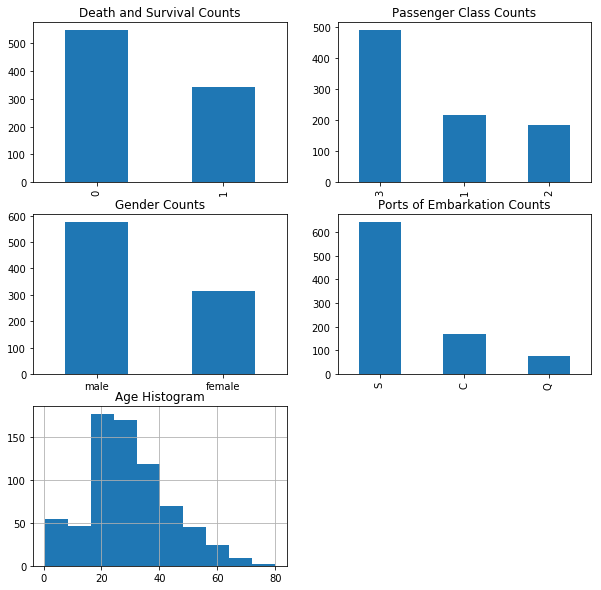

In [0]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

## Feature: Passenger Classes

From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class.  We'll determine which proportion of passengers survived based on their passenger class.

Generate a cross tab of Pclass and Survived:

In [0]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
#pclass_xt.sum(1)
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot the cross tab:

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


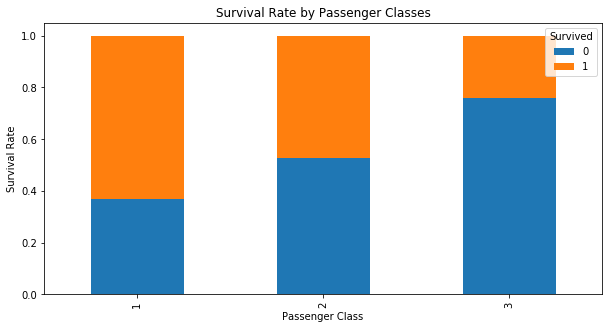

In [0]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(axis=1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
pclass_xt_pct

We can see that passenger class seems to have a significant impact on whether a passenger survived.  Those in First Class the highest chance for survival.

## Feature: Sex

Gender might have also played a role in determining a passenger's survival rate.  We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

In [0]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Transform Sex from a string to a number representation:

In [0]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

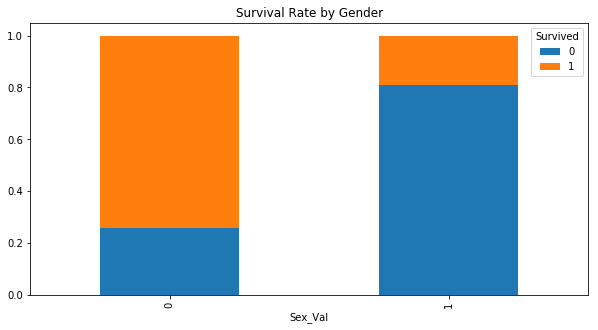

In [0]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at both Sex and Pclass.

Count males and females in each Pclass:

In [0]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print ('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print ('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Plot survival rate by Sex and Pclass:

Text(0, 0.5, 'Survival Rate')

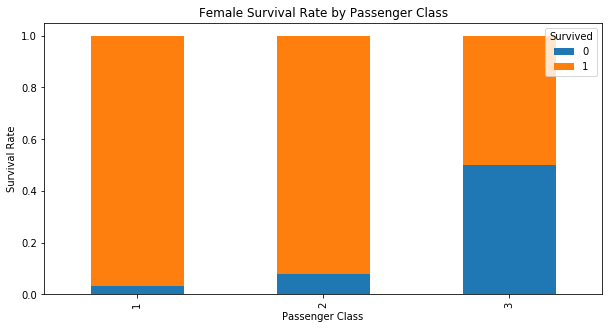

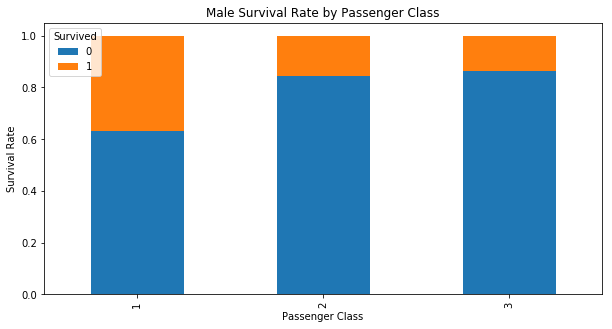

In [0]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

## Feature: Embarked

The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [0]:
df_train[df_train['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Since the vast majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S': 

In [0]:
from numpy import nan
df_train.replace({'Embarked' : 
               { np.nan : 'S' 
               }
           }, 
           inplace=True)

Verify we do not have any more NaNs for Embarked:

In [0]:
embarked_locs = sorted(df_train['Embarked'].unique())
embarked_locs

['C', 'Q', 'S']

Prepare to map Embarked from a string to a number representation:

In [0]:
# Get the unique values of Embarked
embarked_locs = sorted(df_train['Embarked'].unique())

embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(1, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 1, 'Q': 2, 'S': 3}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [0]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3


Plot the histogram for Embarked_Val:

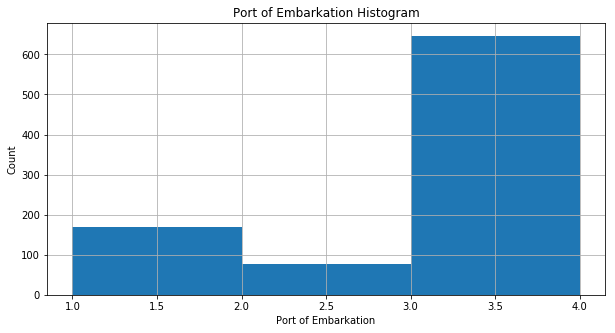

In [0]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(1, 4))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0, 0.5, 'Survival Rate')

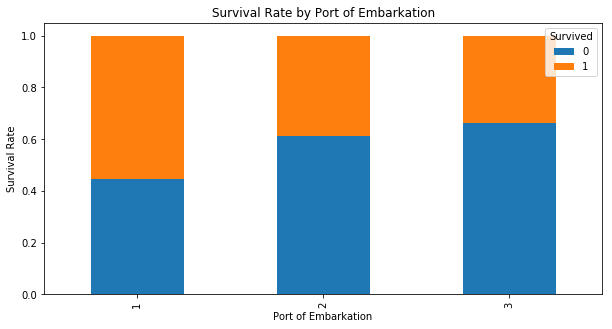

In [0]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [0]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[1, 2, 3]

It appears those that embarked in location 'C': 1 had the highest rate of survival.  We'll dig in some more to see why this might be the case.  Below we plot a graphs to determine gender and passenger class makeup for each port:

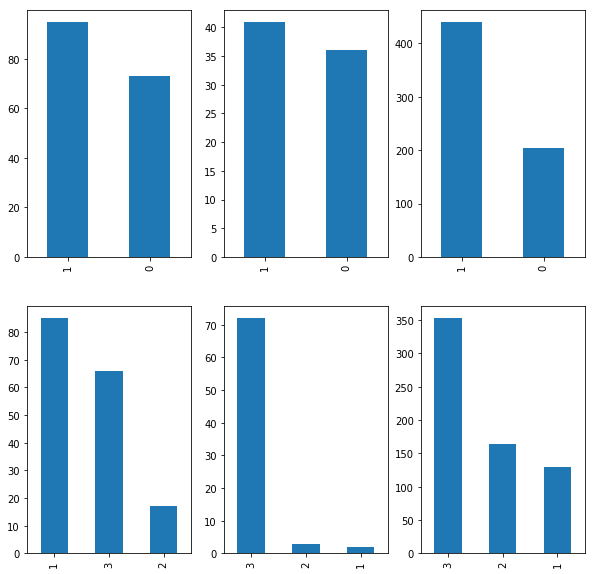

In [0]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 

rows = 2
cols = 3
col_names = ('Sex_Val', 'Pclass')

for portIdx in embarked_locs:
    for colIdx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (colIdx, portIdx - 1))
        df_train[df_train['Embarked_Val'] == portIdx][col_names[colIdx]] \
            .value_counts().plot(kind='bar')

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables:

In [0]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,0,0,1


## Feature: Age

The Age column seems like an important feature--unfortunately it is missing many values.  We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [0]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [0]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [0]:
len(df_train[df_train['AgeFill'].isnull()])

0

Plot a normalized cross tab for AgeFill and Survived:

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Age')

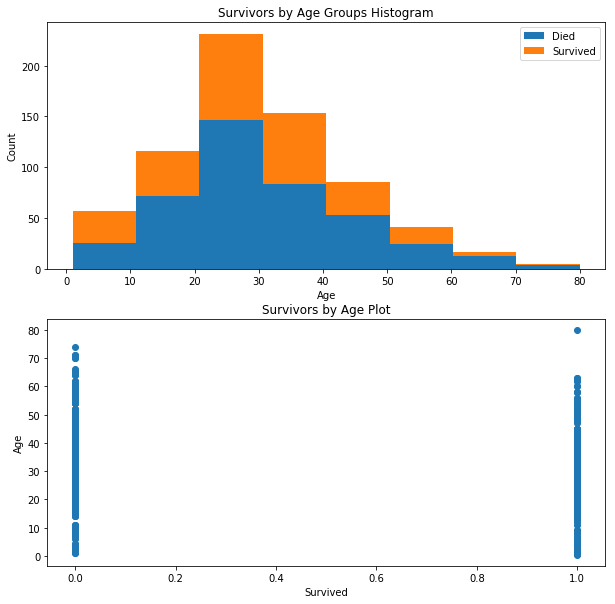

In [0]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])

axes[0].hist([df1, df2], 
             bins=(int)(max_age / bin_size),
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

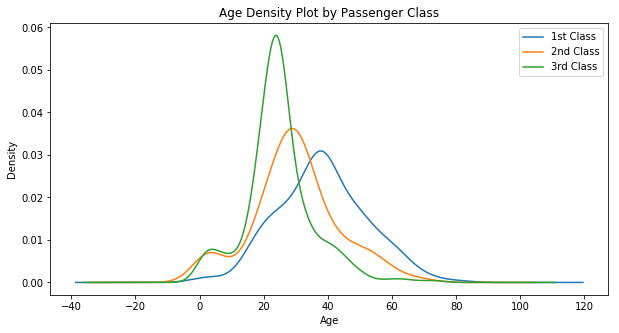

In [0]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

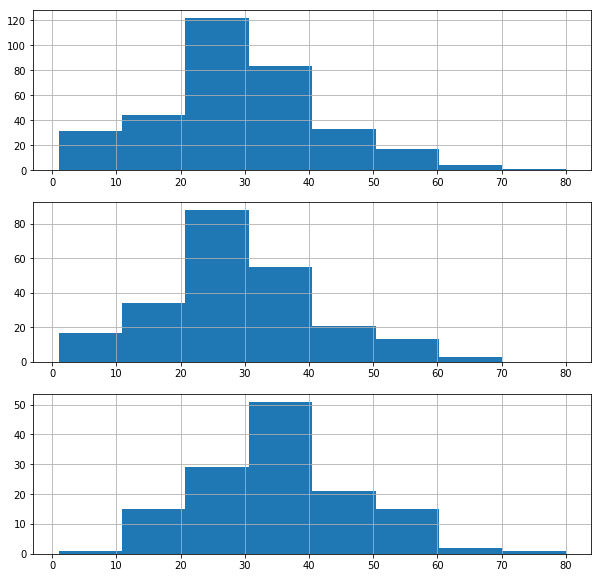

In [0]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=(int)(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=(int)(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=(int)(max_age / bin_size), range=(1, max_age))

In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

## Feature: Family Size

Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,0,0,1,35.0,0


Plot a histogram of FamilySize:

Text(0.5, 1.0, 'Family Size Histogram')

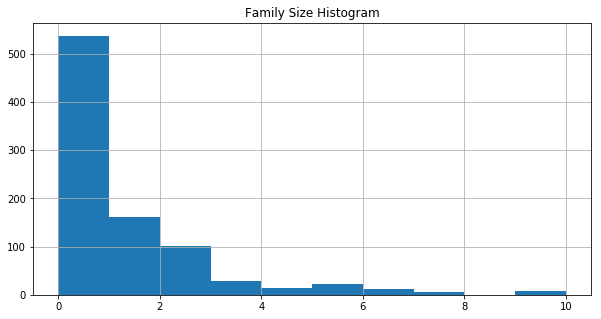

In [0]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot a histogram of AgeFill segmented by Survived:

Text(0.5, 1.0, 'Survivors by Family Size')

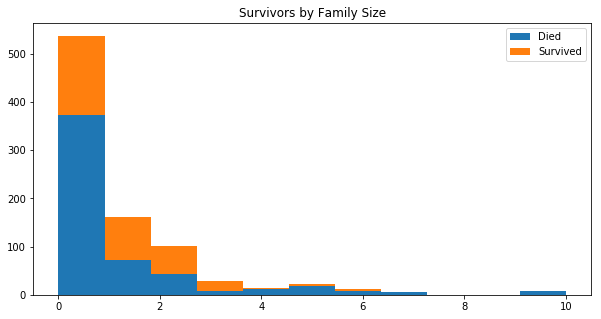

In [0]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Based on the histograms, it is not immediately obvious what impact FamilySize has on survival.  The machine learning algorithms might benefit from this feature.

Additional features we might want to engineer might be related to the Name column, for example honorrary or pedestrian titles might give clues and better predictive power for a male's survival.

## Feature: Title

In [0]:
def fill_Title(X_train):

    for typeName in ["Ms.", "Miss.", "Mr.", "Sir.", "Major", "Dr.", "Master.", "Mme."]:

        mask =  (X_train["Name"].str.contains(typeName))

        replaceTitle = typeName

        if(typeName== "Mme."):

           replaceTitle = "Ms."

        X_train.loc[mask,"Title"] = replaceTitle

   

    mask = X_train["Title"].isnull() & (X_train["Age"]<14) & (X_train["Sex"]=="male")

    X_train.loc[mask, "Title"] = "Master."

   
    mask = X_train["Title"].isnull() & (X_train["Age"]>13) & (X_train["Sex"]=="male")


    X_train.loc[mask, "Title"] = "Mr."

    mask = X_train["Title"].isnull() & (X_train["Sex"]=="female")

    X_train.loc[mask, "Title"] = "Miss."

    return X_train 


In [0]:
df_train = fill_Title(df_train)
df_train.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Sex_Val             int64
Embarked_Val        int64
Embarked_Val_1      uint8
Embarked_Val_2      uint8
Embarked_Val_3      uint8
AgeFill           float64
FamilySize          int64
Title              object
dtype: object

## Final Data Preparation for Machine Learning

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [0]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Title       object
dtype: object

Drop the columns we won't use:

In [0]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature.
* The Embarked_Val as we decided to use dummy variables instead.

In [0]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_1      uint8
Embarked_Val_2      uint8
Embarked_Val_3      uint8
AgeFill           float64
FamilySize          int64
Title              object
dtype: object

In [0]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Title'], prefix='Title_Val')], axis=1)
df_train = df_train.drop(['Title'], axis=1)
df_train.head()
df_train.dtypes

Survived               int64
Pclass                 int64
Fare                 float64
Sex_Val                int64
Embarked_Val_1         uint8
Embarked_Val_2         uint8
Embarked_Val_3         uint8
AgeFill              float64
FamilySize             int64
Title_Val_Dr.          uint8
Title_Val_Major        uint8
Title_Val_Master.      uint8
Title_Val_Miss.        uint8
Title_Val_Mr.          uint8
Title_Val_Ms.          uint8
Title_Val_Sir.         uint8
dtype: object

Convert the DataFrame to a numpy array:

In [0]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  1.    ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 71.2833, ...,  1.    ,  0.    ,  0.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 30.    , ...,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  1.    ,  0.    ,  0.    ]])

## Data Wrangling Summary

Below is a summary of the data wrangling we performed on our training data set.  We encapsulate this in a function since we'll need to do the same operations to our test set later.

In [0]:
def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked' : 
                       { np.nan : 'S' 
                       }
                   }, 
                   inplace=True)
  
    
    # Get the unique values of Embarked
    embarked_locs = sorted(df['Embarked'].unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
   
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()]) > 0:
        df.fillna(0, inplace=True)
        avg_fare = df.mean()
        df.replace({ np.nan: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
    
    # Extract title headers
    df = fill_Title(df)
    df = pd.concat([df, pd.get_dummies(df['Title'], prefix='Title_Val')], axis=1)
    df = df.drop(['Title'], axis=1)
    
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

## Random Forest: Training

Create the random forest object:

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_test1 = {'n_estimators':range(10, 400, 5)}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(criterion='entropy', 
                                                          random_state=10, oob_score=True),
                       param_grid =param_test1, scoring='roc_auc', cv=5)

In [0]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

Fit the training data and create the decision trees:

In [0]:
gsearch1.fit(train_features, train_target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [0]:
'''
param_test2 = {'max_depth':range(3,50,2), 'min_samples_split':range(2,201,20)}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 250, criterion='entropy',
                       random_state=10, oob_score=True),
                       param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
'''

In [0]:
'''
gsearch2.fit(train_features, train_target)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_
'''

In [0]:
# Fit the model to our training data
clf = RandomForestClassifier(n_estimators= 250, criterion='entropy',
                             random_state=10)
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

In [0]:
'''
param_test3= {'min_samples_split':range(2,50,2), 'min_samples_leaf':range(1,60,5)}
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=11,
                                   min_samples_split=22, random_state=10, oob_score=True),
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
'''

In [0]:
'''
gsearch3.fit(train_features, train_target)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_
'''

In [0]:
# Fit the model to our training data
clf = RandomForestClassifier(n_estimators= 385, criterion='entropy',
                             random_state=10, oob_score=True)
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

In [0]:
param_test4= {'max_features':range(3, 15, 2)}
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators= 385,
                                                          random_state=10, oob_score=True),
                       param_grid = param_test4,scoring='roc_auc',iid=False, cv=5)

In [0]:
gsearch4.fit(train_features, train_target)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [0]:
# Fit the model to our training data
clf = RandomForestClassifier(n_estimators= 385, max_features=13, criterion='entropy',
                             random_state=10, oob_score=True)
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

## Random Forest: Predicting

Read the test data:

In [0]:
df_test = pd.read_csv('./drive/My Drive/titanic/test.csv')
df_test.head()

Note the test data does not contain the column 'Survived', we'll use our trained model to predict these values.

In [0]:
# Data wrangle the test set and convert it to a numpy array
df_test = clean_data(df_test, drop_passenger_id=False)
# Fill the missing column
df_test['Title_Val_Sir.'] = 0
df_test['Title_Val_Major'] = 0
test_data = df_test.values
df_test.info()

Take the decision trees and run it on the test data:

In [0]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]

# Predict the Survival values for the test data
test_y = clf.predict(test_x)


## Random Forest: Prepare for Kaggle Submission

Create a DataFrame by combining the index from the test data with the output of predictions, then write the results to the output:

In [0]:
df_test['Survived'] = test_y
df_test[['PassengerId', 'Survived']] \
    .to_csv('./drive/My Drive/titanic/results-rf2.csv', index=False)

## Evaluate Model Accuracy

Submitting to Kaggle will give you an accuracy score.  It would be helpful to get an idea of accuracy without submitting to Kaggle.

We'll split our training data, 80% will go to "train" and 20% will go to "test":

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.2, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 15) (891,)
(712, 15) (712,)
(179, 15) (179,)


Use the new training data to fit the model, predict, and get the accuracy score:

In [0]:
clf = RandomForestClassifier(n_estimators= 385, max_features=13, criterion='entropy',
                             random_state=10, oob_score=True)
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

roc_auc = roc_auc_score(test_y, predict_y)
from sklearn.metrics import roc_auc_score
print ("AUC - ROC : ", roc_auc)


print("OOB Score = %.2f" % (clf.oob_score_))

feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = df_train.columns.drop(['Survived']),
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

Accuracy = 0.86
AUC - ROC :  0.8377470355731225
OOB Score = 0.82


,importance
Fare,0.271291
AgeFill,0.244902
Sex_Val,0.223146
Pclass,0.088445
FamilySize,0.077656
Title_Val_Mr.,0.037871
Embarked_Val_3,0.013465
Title_Val_Master.,0.011613
Embarked_Val_1,0.011305
Embarked_Val_2,0.010782


View the Confusion Matrix:

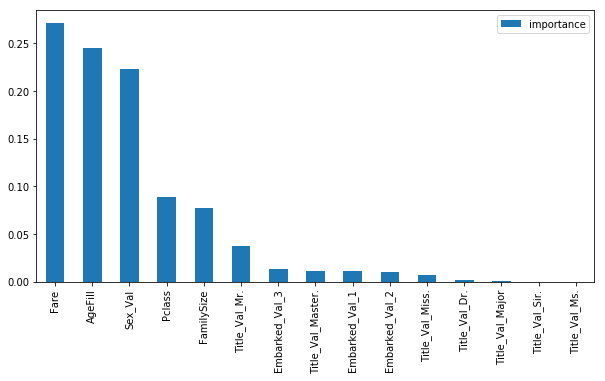

In [0]:
feature_importances.plot(kind='bar')

|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

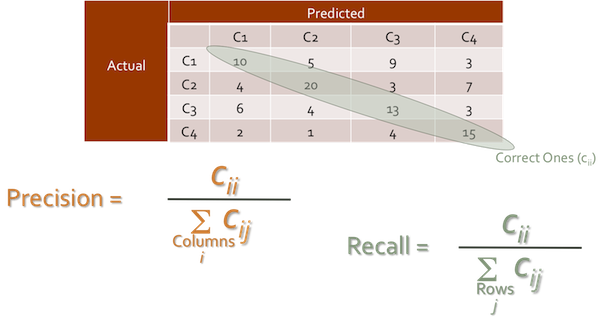

In [0]:
from IPython.core.display import Image 
Image(filename='./drive/My Drive/titanic/confusion_matrix.png', width=800)

Get the model score and confusion matrix:

In [0]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ")
print (confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.86 

Confusion Matrix 
[[103   7]
 [ 18  51]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 103 |   7 |
Actual   |-----|-----|
       1 |  18 |  51 |
         |-----|-----|


Display the classification report:

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.94      0.89       110
    Survived       0.88      0.74      0.80        69

    accuracy                           0.86       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



The trained model has estimated a probability for each of your observations, but the threshold will ultimately decide to in which class your observation will be categorized.

In [0]:
# TPR and FPR of your model for one specific threshold level
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(test_y, predict_y)

print("fpr: ", fpr)
print("tpr: ", tpr)
print("thresholds: ", thresholds)

fpr:  [0.         0.06363636 1.        ]
tpr:  [0.         0.73913043 1.        ]
thresholds:  [2. 1. 0.]


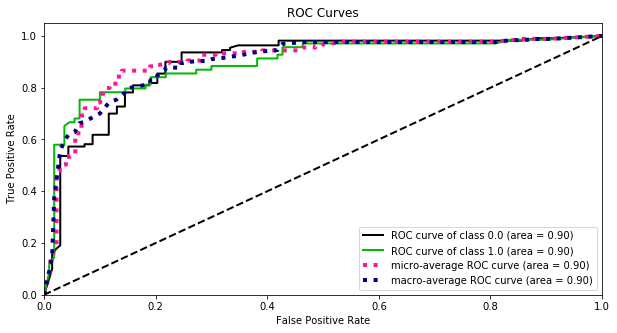

In [0]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(test_y, clf.predict_proba(test_x))

In [0]:
#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


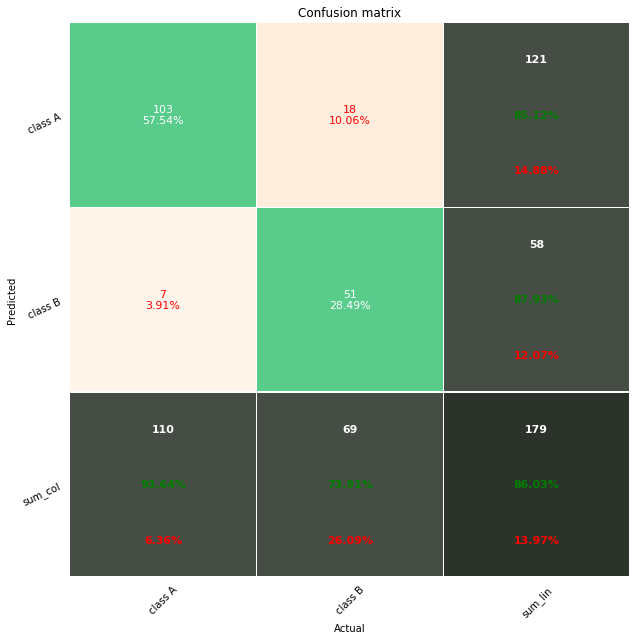

In [0]:
columns = []
annot = True;
cmap = 'Oranges';
fmt = '.2f'
lw = 0.5
cbar = False
show_null_values = 2
pred_val_axis = 'y'
#size::
fz = 12;
figsize = [9,9];
if(len(test_y) > 10):
    fz=9; figsize=[14,14];
plot_confusion_matrix_from_data(test_y, predict_y, columns,
                                annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)